### PCA 개요 

In [ ]:
##PCA = Principle Components Analysis : 주성분 분석 >> 대표적인 차원 축소 알고리즘
##차원 축소를 하기 위해 어떤 성분이 중요한지 추려내서 차원을 축소합니당
##참고할만한 링크 : https://excelsior-cjh.tistory.com/167

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)

##target이라는 칼럼 만들어 주기 
irisDF['target']=iris.target 

irisDF.head(3)

sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0

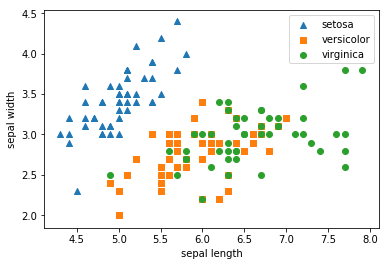

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
##enumerate는 index포함해서 자료 반환 
##예시:
##for i, name in enumerate(['body', 'foo', 'bar']):
##     print(i, name)
##0 body
##1 foo
##2 bar


for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

    
##범례, x축, y축 지정
plt.legend() 
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()


##보면 파란색은 잘 분리되어 있는데 주황색, 초록색이 섞여 있음

In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

In [5]:
from sklearn.decomposition import PCA

pca = PCA().fit(iris_scaled)
np.cumsum(pca.explained_variance_ratio_) 
##lamda1, lamda2 > 90% 이상의 정보가 모여있다
##: 그래서 lamda 2 가 충분하다고 생각 > 차원 축소가능!
##이렇게 하면 원 데이터의 5%가량 손실이 남

array([0.76740358, 0.95023085, 0.98747608, 0.9958933 , 1.        ])

In [6]:

pca = PCA(n_components=2) ##위에서 lamda2에서 90%했으니 component를 2로 설정!

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns=['pca_component_1','pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)

irisDF_pca['target']=iris.target

irisDF_pca.head(3)

pca_component_1  pca_component_2  target
0        -2.576120         0.474499       0
1        -2.415322        -0.678092       0
2        -2.659333        -0.348282       0

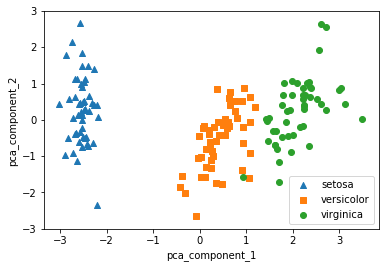

In [8]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

##처음보다 주황, 초록이 명확히 분리된 모습!

In [13]:
print(pca.explained_variance_ratio_)
##여기서np.cumsum(pca.explained_variance_ratio_)하면 누적으로 나옴 
##이 결과의 의미는 2개 변수가 총 95%를 설명했다 + 1변수의 설명력은 76%

[0.76740358 0.18282727]


In [ ]:
##여기서 부터 이거 왜 한건지 이해가 안되기 시쟉,, 그냥 차원 축소 안하고 정확도랑 차원 축소후의 정확도 비교한건가?

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=100) ##나무를 100그루 심습니다

scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3) ##cv = 반복 횟수 : 세번하세요 

print(scores)

[0.98039216 0.92156863 0.97916667]


In [15]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]

scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print(scores_pca)

[0.98039216 0.98039216 1.        ]
